In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse
from sklearn.metrics import mean_squared_error

0     53.426804
1     61.530358
2     47.475640
3     59.813208
4     55.142188
        ...    
69    31.588117
70    53.660932
71    46.682229
72    43.107820
73    70.346076
Name: 32.502345269453031, Length: 74, dtype: float64
0      68.777596
1      62.562382
2      71.546632
3      87.230925
4      78.211518
         ...    
69     50.392670
70     63.642399
71     72.247251
72     57.812513
73    104.257102
Name: 31.70700584656992, Length: 74, dtype: float64


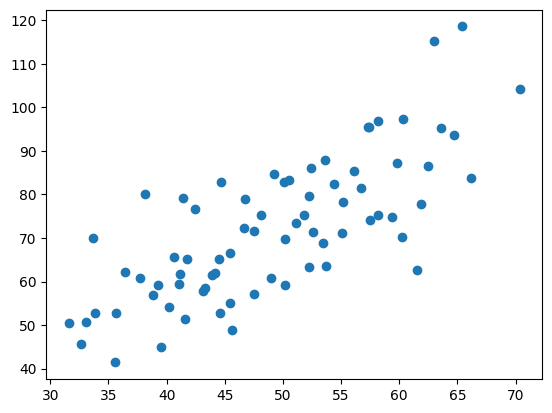

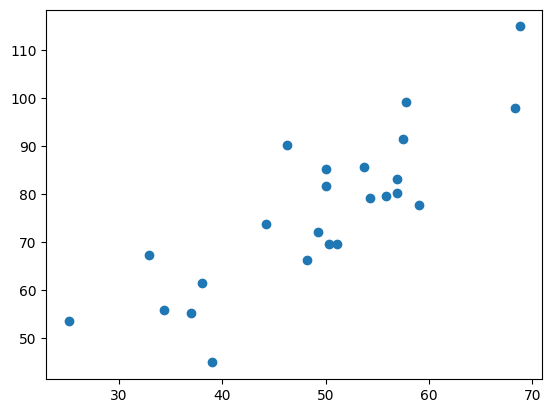

In [4]:
data_train = pd.read_csv('data_set.csv')
x_train = data_train.iloc[0:74,0]
y_train = data_train.iloc[0:74,1]
x_test = data_train.iloc[75:100,0]
y_test = data_train.iloc[75:100,1]
x1=data_train.iloc[:,0]
y1=data_train.iloc[:,1]
#print(data_train)
print(x_train)
print(y_train)
#print(x_test)
n = float(len(x_train)) # Number of elements in X
n = float(len(x_test))
n = float(len(data_train))
plt.figure()
plt.scatter(x_train,y_train)
plt.figure()
plt.scatter(x_test,y_test)
plt.show()

In [5]:
#1t method for training
w = np.random.randn()
b = np.random.randn()      #step number 2 Initialize the weights and bias 𝒘,𝑏 to small random numbers close to zero.
L = 0.0001                 #learning rate
epochs = 100
epochs = 100
print(w,b)  
for epoch in range(epochs):
    Y_pred = w*x_train + b  # The current predicted value of Y
    D_w = (-2/n) * sum(x_train * (y_train - Y_pred))  # Derivative wrt w
    D_b = (-2/n) * sum(y_train - Y_pred)  # Derivative wrt b
    w = w - L * D_w  # Update w
    b = b - L * D_b  # Update b
print(w,b)
print(x_train)
print(y_train)

0.5621237228803587 -0.5950164911112955
1.4698871721104716 -0.5729095082391319
0     53.426804
1     61.530358
2     47.475640
3     59.813208
4     55.142188
        ...    
69    31.588117
70    53.660932
71    46.682229
72    43.107820
73    70.346076
Name: 32.502345269453031, Length: 74, dtype: float64
0      68.777596
1      62.562382
2      71.546632
3      87.230925
4      78.211518
         ...    
69     50.392670
70     63.642399
71     72.247251
72     57.812513
73    104.257102
Name: 31.70700584656992, Length: 74, dtype: float64


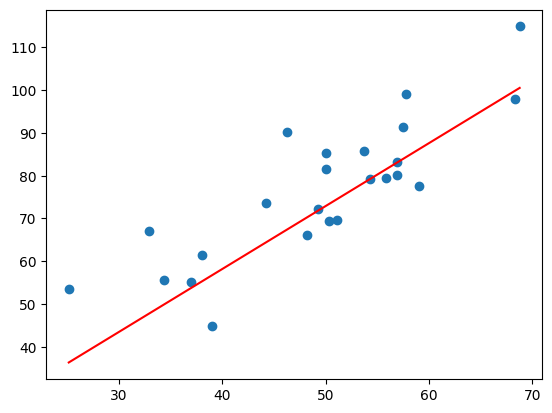

0     53.426804
1     61.530358
2     47.475640
3     59.813208
4     55.142188
        ...    
69    31.588117
70    53.660932
71    46.682229
72    43.107820
73    70.346076
Name: 32.502345269453031, Length: 74, dtype: float64
0      68.777596
1      62.562382
2      71.546632
3      87.230925
4      78.211518
         ...    
69     50.392670
70     63.642399
71     72.247251
72     57.812513
73    104.257102
Name: 31.70700584656992, Length: 74, dtype: float64
99.24068256603952


In [6]:
#2nd method for predicting
Y_pred = w*x_test + b
plt.scatter(x_test, y_test)
plt.plot([min(x_test), max(x_test)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()
print(x_train)
print(y_train)
RMSE=np.mean((Y_pred - y_test) ** 2)
print(RMSE)


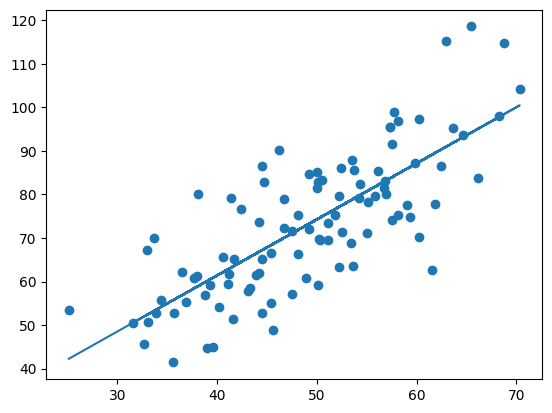

0     53.426804
1     61.530358
2     47.475640
3     59.813208
4     55.142188
        ...    
94    50.030174
95    49.239765
96    50.039576
97    48.149859
98    25.128485
Name: 32.502345269453031, Length: 99, dtype: float64
0     53.426804
1     61.530358
2     47.475640
3     59.813208
4     55.142188
        ...    
69    31.588117
70    53.660932
71    46.682229
72    43.107820
73    70.346076
Name: 32.502345269453031, Length: 74, dtype: float64
0      68.777596
1      62.562382
2      71.546632
3      87.230925
4      78.211518
         ...    
69     50.392670
70     63.642399
71     72.247251
72     57.812513
73    104.257102
Name: 31.70700584656992, Length: 74, dtype: float64
107.47043700950904


In [7]:
#least square error method
N = len(x1)
sumx = 0
sumxsq = 0
sumy = 0
sumxy = 0
for i in range(N):
  sumx = sumx + x1[i]
  sumxsq = sumxsq + math.pow(x1[i],2)
  sumy = sumy + y1[i]
  sumxy = sumxy + (x1[i] * y1[i])

firstmatrix = [[N,sumx],[sumx,sumxsq]]
secondmatrix = [sumy,sumxy]
firstmatrixinverse = np.linalg.inv(firstmatrix)
res = np.dot(firstmatrixinverse,secondmatrix)
b = res[0]
w = res[1]
ypred = (w*x1)+b
plt.figure()
ax = plt.axes()
plt.scatter(x1, y1)
plt.plot(x1,ypred)
plt.show()
print(x1)
print(x_train)
print(y_train)
RMSE1=np.mean((ypred - y1) ** 2)
print(RMSE1)

Mean squared error: 124.67


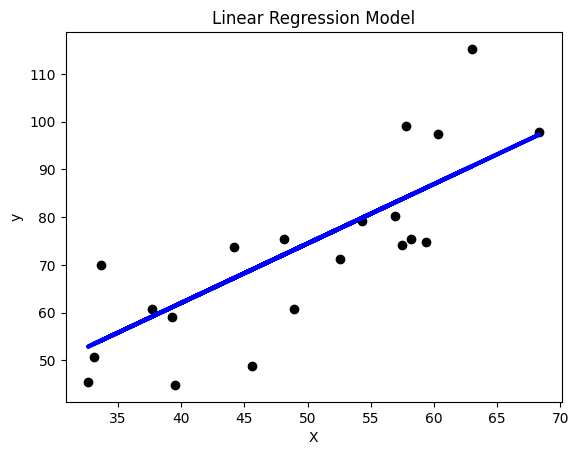

0     53.426804
1     61.530358
2     47.475640
3     59.813208
4     55.142188
        ...    
69    31.588117
70    53.660932
71    46.682229
72    43.107820
73    70.346076
Name: 32.502345269453031, Length: 74, dtype: float64
0      68.777596
1      62.562382
2      71.546632
3      87.230925
4      78.211518
         ...    
69     50.392670
70     63.642399
71     72.247251
72     57.812513
73    104.257102
Name: 31.70700584656992, Length: 74, dtype: float64


In [8]:
#using scikit-learn
XS=x1.values.reshape(-1,1)
YS=y1

def train_linear_model(x_train7, y_train7):
    lr = LinearRegression()
    lr.fit(x_train7, y_train7)
    return lr

def predict_linear_model(lr_model, x_test7):
    y_pred = lr_model.predict(x_test7)
    return y_pred

x_train7, x_test7, y_train7, y_test7 = train_test_split(XS,YS, test_size=0.2, random_state=74)

# train the model using linear regression
lr_model = train_linear_model(x_train7,y_train7)

# make predictions using the trained model
y_pred = predict_linear_model(lr_model,x_test7)

# calculate the mean squared error
mse8 = np.mean((y_pred - y_test7) ** 2)
print(f"Mean squared error: {mse8:.2f}")

plt.scatter(x_test7, y_test7, color='black')
plt.plot(x_test7, y_pred, color='blue', linewidth=3)

plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print(x_train)
print(y_train)

Epoch 1/50
3/3 [==============================] - 1s 7ms/step - loss: 1348.5698
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 132.1322
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 113.1942
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 114.3883
Epoch 5/50
3/3 [==============================] - 0s 6ms/step - loss: 113.2779
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 112.9156
Epoch 7/50
3/3 [==============================] - 0s 10ms/step - loss: 114.4844
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 114.5903
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 112.0933
Epoch 10/50
3/3 [==============================] - 0s 6ms/step - loss: 112.3417
Epoch 11/50
3/3 [==============================] - 0s 6ms/step - loss: 112.4011
Epoch 12/50
3/3 [==============================] - 0s 7ms/step - loss: 114.2515
Epoch 13/50
3/3 [==============================

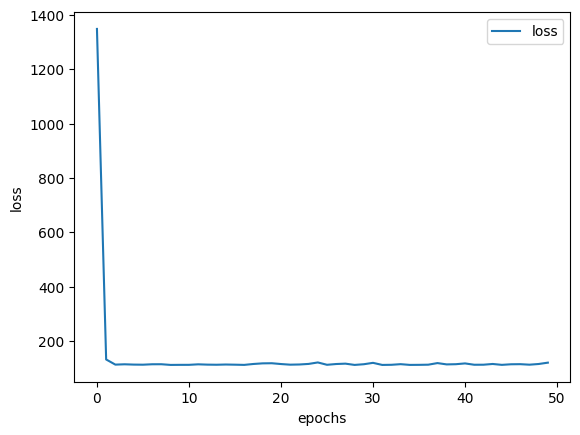

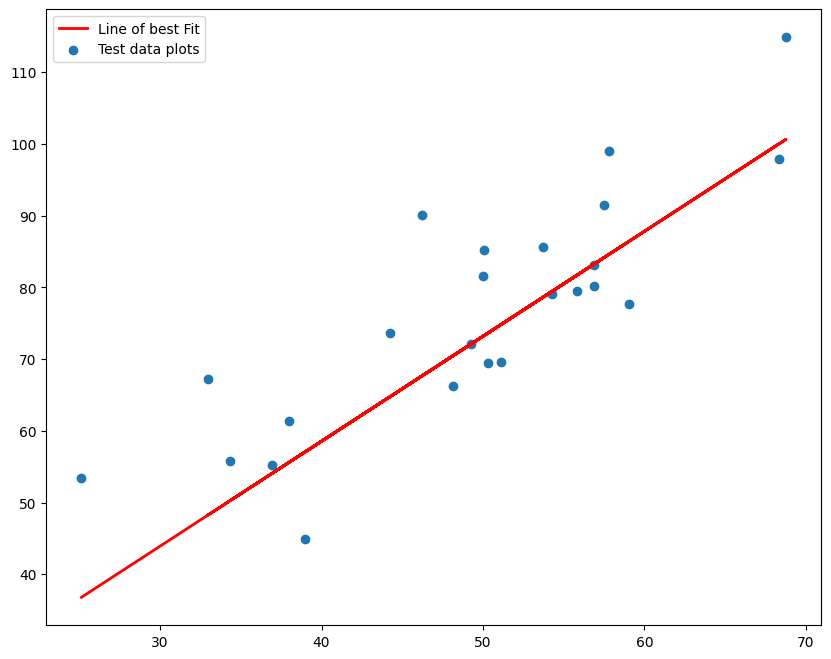

In [9]:
#tensor flow method
#converting to numpy
xR = np.array(x_train).reshape(-1,1)
yR = np.array(y_train)
#print(x_train.shape,y_train.shape)

model = Sequential()
model.add(Dense(1))

"""
(Alternative way for dedfining a sequential model)
model = Sequential([
        Dense(1)
])"""
model.compile(optimizer=SGD(learning_rate=0.0001),loss=mse)
train = model.fit(xR,yR,epochs=50)
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
y_pred10 = model.predict(np.array(x_test).reshape(-1,1))
plt.figure(figsize=(10,8))
plt.plot(x_test,y_pred10,color='red',linewidth=2,label='Line of best Fit')
plt.scatter(x_test,y_test,label='Test data plots')
plt.legend()
print("loss: "+str(train.history['loss'][len(train.history['loss'])-1]))

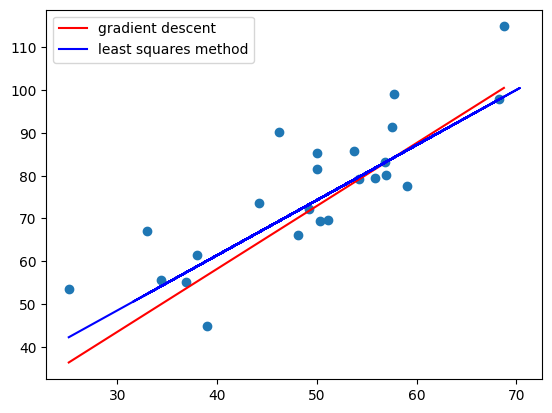

In [10]:
fig, ax = plt.subplots()
plt.scatter(x_test, y_test)
plt.plot([min(x_test), max(x_test)], [min(Y_pred), max(Y_pred)], color='red',label='gradient descent') # predicted
plt.plot(x1,ypred,color='blue',label='least squares method')
leg = ax.legend();

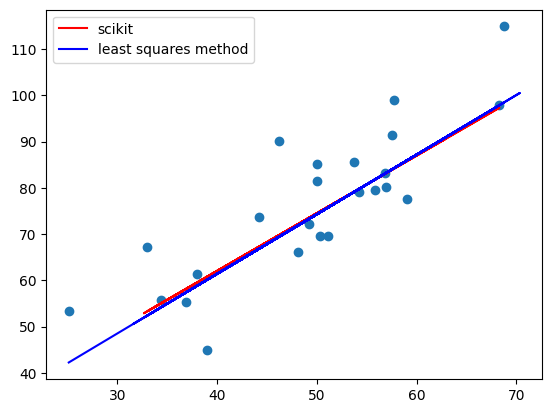

In [11]:
fig, ax = plt.subplots()
plt.scatter(x_test, y_test)
plt.plot(x_test7, y_pred, color='red', label="scikit")
plt.plot(x1,ypred,color='blue',label='least squares method')
leg = ax.legend();

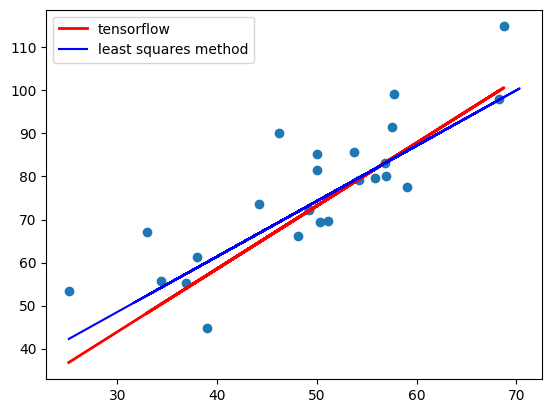

In [12]:
fig, ax = plt.subplots()
plt.scatter(x_test, y_test)
plt.plot(x_test,y_pred10,color='red',linewidth=2,label='tensorflow')
plt.plot(x1,ypred,color='blue',label='least squares method')
leg = ax.legend();